In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [35]:
path = '../Datos LICD.xlsx'

df = pd.read_excel(path)

df

,Codigo,Codigos,Codigo actual,Código \ninterno,Edad Dx,IMC,Comorbilidades,HTA,DM2,RAN,...,C20:5n3 (EPA),C22:6n3 (DHA),AGS,AGM,AGPI,n-6 (LA-ARA),"n-3 (ALA, EPA, DHA)",n-3 (EPA + DHA),RELACIÓN\nn-6/n-3,RELACIÓN\n ARA/EPA+DHA
0,P-CS-1,SC-CS-1,NA-03,1,40,35.99,0,0,0,5240.0,...,2.169641,1.099265,59.615691,22.914686,17.469623,11.973153,5.496470,NaN,2.178335,NaN
1,P-CS-2,SC-CS-2,NA-04,2,41,24.40,0,0,0,NaN,...,2.984917,1.579496,52.307945,22.652729,25.039326,18.189058,6.850268,NaN,2.655233,NaN
2,P-CS-3,SC-CS-3,NA-05,3,66,29.76,1,1,0,4090.0,...,4.731568,4.143346,52.302080,13.564017,34.133904,24.940245,9.193659,NaN,2.712766,NaN
3,P-CS-5,SC-CS-5,NA-08,4,60,24.78,1,1,0,3980.0,...,0.809478,1.788759,61.588986,17.076779,18.396667,13.490231,4.906436,NaN,2.749497,NaN
4,P-CS-7,SC-CS-7,NA-09,5,53,26.81,1,0,0,NaN,...,1.663650,3.068574,60.603992,21.144460,18.251548,13.519325,4.732224,NaN,2.856865,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NaN,NaN,NA-46,73,53,30.27,0,0,0,NaN,...,0.278146,0.785157,52.397561,10.475878,37.126561,34.334227,2.792334,NaN,12.295890,NaN
73,NaN,RE bajo,NA-47,74,68,25.88,0,0,0,3600.0,...,0.503820,0.540800,54.992366,19.914015,25.093619,23.284311,1.809308,NaN,12.869178,NaN
74,NaN,NaN,NA-48,75,78,28.60,1,1,0,NaN,...,0.661364,0.879403,51.054557,19.231738,29.713705,27.866271,1.847434,NaN,15.083770,NaN
75,NaN,NaN,NA-49,76,61,21.74,1,0,0,NaN,...,0.492237,0.498309,51.048423,20.998756,27.952821,26.229994,1.722827,NaN,15.224970,NaN


In [36]:
df.isna().sum()

Codigo                                                               58
Codigos                                                              38
Codigo actual                                                         0
Código \ninterno                                                      0
Edad Dx                                                               0
IMC                                                                   2
Comorbilidades                                                        0
HTA                                                                   0
DM2                                                                   0
RAN                                                                  20
RAL                                                                  20
RAN/RAL                                                              77
Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4         0
GrupoRH+1 RH-0                                                  

In [41]:
col = ['Codigo ', 'Codigos', 'Codigo actual', 'Código \ninterno', 'RAN', 'RAL', 'RAN/RAL', 'GrupoRH+1 RH-0',
       'subtipo TN con RE<10', 'GH core', 'GH bp', 'KI67 core (%)', 'KI67 biopsia (%)', 'LN (Si=1; No=0)', 'Etapa',
       'RCB cat', 'Score RCB', 'RPC (1=Sí; 0=No)', 'Abs. Corregida', 'Prot. Carbonilada \n(nmol/ml)', 'Contenido de Carbonilos (nmol/mg)',
       '*La corrección por proteínas es opcional\n(Destacada en amarillo)', 'TBARS MDA (µM)', 'n-3 (EPA + DHA)', 'RELACIÓN\n ARA/EPA+DHA']

In [42]:
data = df.drop(columns=col, errors='ignore')

data

,Edad Dx,IMC,Comorbilidades,HTA,DM2,Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4,Abs Muestra,Abs Control,Proteínas totales\n(mg/ml),TBARS Abs,...,C18:3n3 (a-linolenic),C20:4n6 (arachidonic),C20:5n3 (EPA),C22:6n3 (DHA),AGS,AGM,AGPI,n-6 (LA-ARA),"n-3 (ALA, EPA, DHA)",RELACIÓN\nn-6/n-3
0,40,35.99,0,0,0,2,0.1382,0.0952,728.005886,0.0718,...,2.227564,5.043372,2.169641,1.099265,59.615691,22.914686,17.469623,11.973153,5.496470,2.178335
1,41,24.40,0,0,0,1,0.1450,0.0988,674.069071,0.0618,...,2.285854,6.373311,2.984917,1.579496,52.307945,22.652729,25.039326,18.189058,6.850268,2.655233
2,66,29.76,1,1,0,2,0.1768,0.1006,667.242351,0.1570,...,0.318746,9.930977,4.731568,4.143346,52.302080,13.564017,34.133904,24.940245,9.193659,2.712766
3,60,24.78,1,1,0,3,0.1562,0.1106,657.566424,0.0612,...,2.308200,7.104313,0.809478,1.788759,61.588986,17.076779,18.396667,13.490231,4.906436,2.749497
4,53,26.81,1,0,0,2,0.1217,0.0998,650.993599,0.0784,...,0.000000,12.578260,1.663650,3.068574,60.603992,21.144460,18.251548,13.519325,4.732224,2.856865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,53,30.27,0,0,0,3,0.1661,0.1123,656.691948,0.0759,...,1.729031,11.647535,0.278146,0.785157,52.397561,10.475878,37.126561,34.334227,2.792334,12.295890
73,68,25.88,0,0,0,1,0.2647,0.1138,658.525576,0.1439,...,0.764689,6.003159,0.503820,0.540800,54.992366,19.914015,25.093619,23.284311,1.809308,12.869178
74,78,28.60,1,1,0,2,0.1907,0.1031,598.185154,0.0729,...,0.306667,6.410781,0.661364,0.879403,51.054557,19.231738,29.713705,27.866271,1.847434,15.083770
75,61,21.74,1,0,0,3,0.3324,0.1021,603.065456,0.0728,...,0.732282,11.371463,0.492237,0.498309,51.048423,20.998756,27.952821,26.229994,1.722827,15.224970


In [44]:
data.isna().sum()

Edad Dx                                                          0
IMC                                                              2
Comorbilidades                                                   0
HTA                                                              0
DM2                                                              0
Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4    0
Abs Muestra                                                      0
Abs Control                                                      0
Proteínas totales\n(mg/ml)                                       0
TBARS Abs                                                        0
isoprostanos F8 pg/mL                                            0
C14:0 (myristic)                                                 0
C16:0 (palmitic)                                                 0
C16:1 (palmitoleic)                                              0
C17:0 (heptadecanoic)                                         

In [43]:
data.loc[data.isna().any(axis=1)]

,Edad Dx,IMC,Comorbilidades,HTA,DM2,Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4,Abs Muestra,Abs Control,Proteínas totales\n(mg/ml),TBARS Abs,...,C18:3n3 (a-linolenic),C20:4n6 (arachidonic),C20:5n3 (EPA),C22:6n3 (DHA),AGS,AGM,AGPI,n-6 (LA-ARA),"n-3 (ALA, EPA, DHA)",RELACIÓN\nn-6/n-3
28,50,NaN,1,0,0,1,0.1559,0.0952,585.293400,0.09510,...,2.020783,8.418459,0.810260,2.009730,49.521135,23.149145,27.32972,22.488947,4.840773,4.645735
45,51,NaN,1,0,0,3,0.2260,0.1018,534.431407,0.12817,...,1.472624,4.325547,0.450328,0.527559,55.931804,27.260866,16.80733,14.356819,2.450511,5.858704


In [45]:
# Cambiar los valores en la columna específica
data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'] = data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].apply(lambda x: 1 if x in [2, 3] else 2)

data

,Edad Dx,IMC,Comorbilidades,HTA,DM2,Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4,Abs Muestra,Abs Control,Proteínas totales\n(mg/ml),TBARS Abs,...,C18:3n3 (a-linolenic),C20:4n6 (arachidonic),C20:5n3 (EPA),C22:6n3 (DHA),AGS,AGM,AGPI,n-6 (LA-ARA),"n-3 (ALA, EPA, DHA)",RELACIÓN\nn-6/n-3
0,40,35.99,0,0,0,1,0.1382,0.0952,728.005886,0.0718,...,2.227564,5.043372,2.169641,1.099265,59.615691,22.914686,17.469623,11.973153,5.496470,2.178335
1,41,24.40,0,0,0,2,0.1450,0.0988,674.069071,0.0618,...,2.285854,6.373311,2.984917,1.579496,52.307945,22.652729,25.039326,18.189058,6.850268,2.655233
2,66,29.76,1,1,0,1,0.1768,0.1006,667.242351,0.1570,...,0.318746,9.930977,4.731568,4.143346,52.302080,13.564017,34.133904,24.940245,9.193659,2.712766
3,60,24.78,1,1,0,1,0.1562,0.1106,657.566424,0.0612,...,2.308200,7.104313,0.809478,1.788759,61.588986,17.076779,18.396667,13.490231,4.906436,2.749497
4,53,26.81,1,0,0,1,0.1217,0.0998,650.993599,0.0784,...,0.000000,12.578260,1.663650,3.068574,60.603992,21.144460,18.251548,13.519325,4.732224,2.856865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,53,30.27,0,0,0,1,0.1661,0.1123,656.691948,0.0759,...,1.729031,11.647535,0.278146,0.785157,52.397561,10.475878,37.126561,34.334227,2.792334,12.295890
73,68,25.88,0,0,0,2,0.2647,0.1138,658.525576,0.1439,...,0.764689,6.003159,0.503820,0.540800,54.992366,19.914015,25.093619,23.284311,1.809308,12.869178
74,78,28.60,1,1,0,1,0.1907,0.1031,598.185154,0.0729,...,0.306667,6.410781,0.661364,0.879403,51.054557,19.231738,29.713705,27.866271,1.847434,15.083770
75,61,21.74,1,0,0,1,0.3324,0.1021,603.065456,0.0728,...,0.732282,11.371463,0.492237,0.498309,51.048423,20.998756,27.952821,26.229994,1.722827,15.224970


In [46]:
data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].value_counts()

Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4
2    45
1    32
Name: count, dtype: int64

In [47]:
data = data.dropna(axis=0, how='any').reset_index(drop=True)

data

,Edad Dx,IMC,Comorbilidades,HTA,DM2,Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4,Abs Muestra,Abs Control,Proteínas totales\n(mg/ml),TBARS Abs,...,C18:3n3 (a-linolenic),C20:4n6 (arachidonic),C20:5n3 (EPA),C22:6n3 (DHA),AGS,AGM,AGPI,n-6 (LA-ARA),"n-3 (ALA, EPA, DHA)",RELACIÓN\nn-6/n-3
0,40,35.99,0,0,0,1,0.1382,0.0952,728.005886,0.0718,...,2.227564,5.043372,2.169641,1.099265,59.615691,22.914686,17.469623,11.973153,5.496470,2.178335
1,41,24.40,0,0,0,2,0.1450,0.0988,674.069071,0.0618,...,2.285854,6.373311,2.984917,1.579496,52.307945,22.652729,25.039326,18.189058,6.850268,2.655233
2,66,29.76,1,1,0,1,0.1768,0.1006,667.242351,0.1570,...,0.318746,9.930977,4.731568,4.143346,52.302080,13.564017,34.133904,24.940245,9.193659,2.712766
3,60,24.78,1,1,0,1,0.1562,0.1106,657.566424,0.0612,...,2.308200,7.104313,0.809478,1.788759,61.588986,17.076779,18.396667,13.490231,4.906436,2.749497
4,53,26.81,1,0,0,1,0.1217,0.0998,650.993599,0.0784,...,0.000000,12.578260,1.663650,3.068574,60.603992,21.144460,18.251548,13.519325,4.732224,2.856865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,53,30.27,0,0,0,1,0.1661,0.1123,656.691948,0.0759,...,1.729031,11.647535,0.278146,0.785157,52.397561,10.475878,37.126561,34.334227,2.792334,12.295890
71,68,25.88,0,0,0,2,0.2647,0.1138,658.525576,0.1439,...,0.764689,6.003159,0.503820,0.540800,54.992366,19.914015,25.093619,23.284311,1.809308,12.869178
72,78,28.60,1,1,0,1,0.1907,0.1031,598.185154,0.0729,...,0.306667,6.410781,0.661364,0.879403,51.054557,19.231738,29.713705,27.866271,1.847434,15.083770
73,61,21.74,1,0,0,1,0.3324,0.1021,603.065456,0.0728,...,0.732282,11.371463,0.492237,0.498309,51.048423,20.998756,27.952821,26.229994,1.722827,15.224970


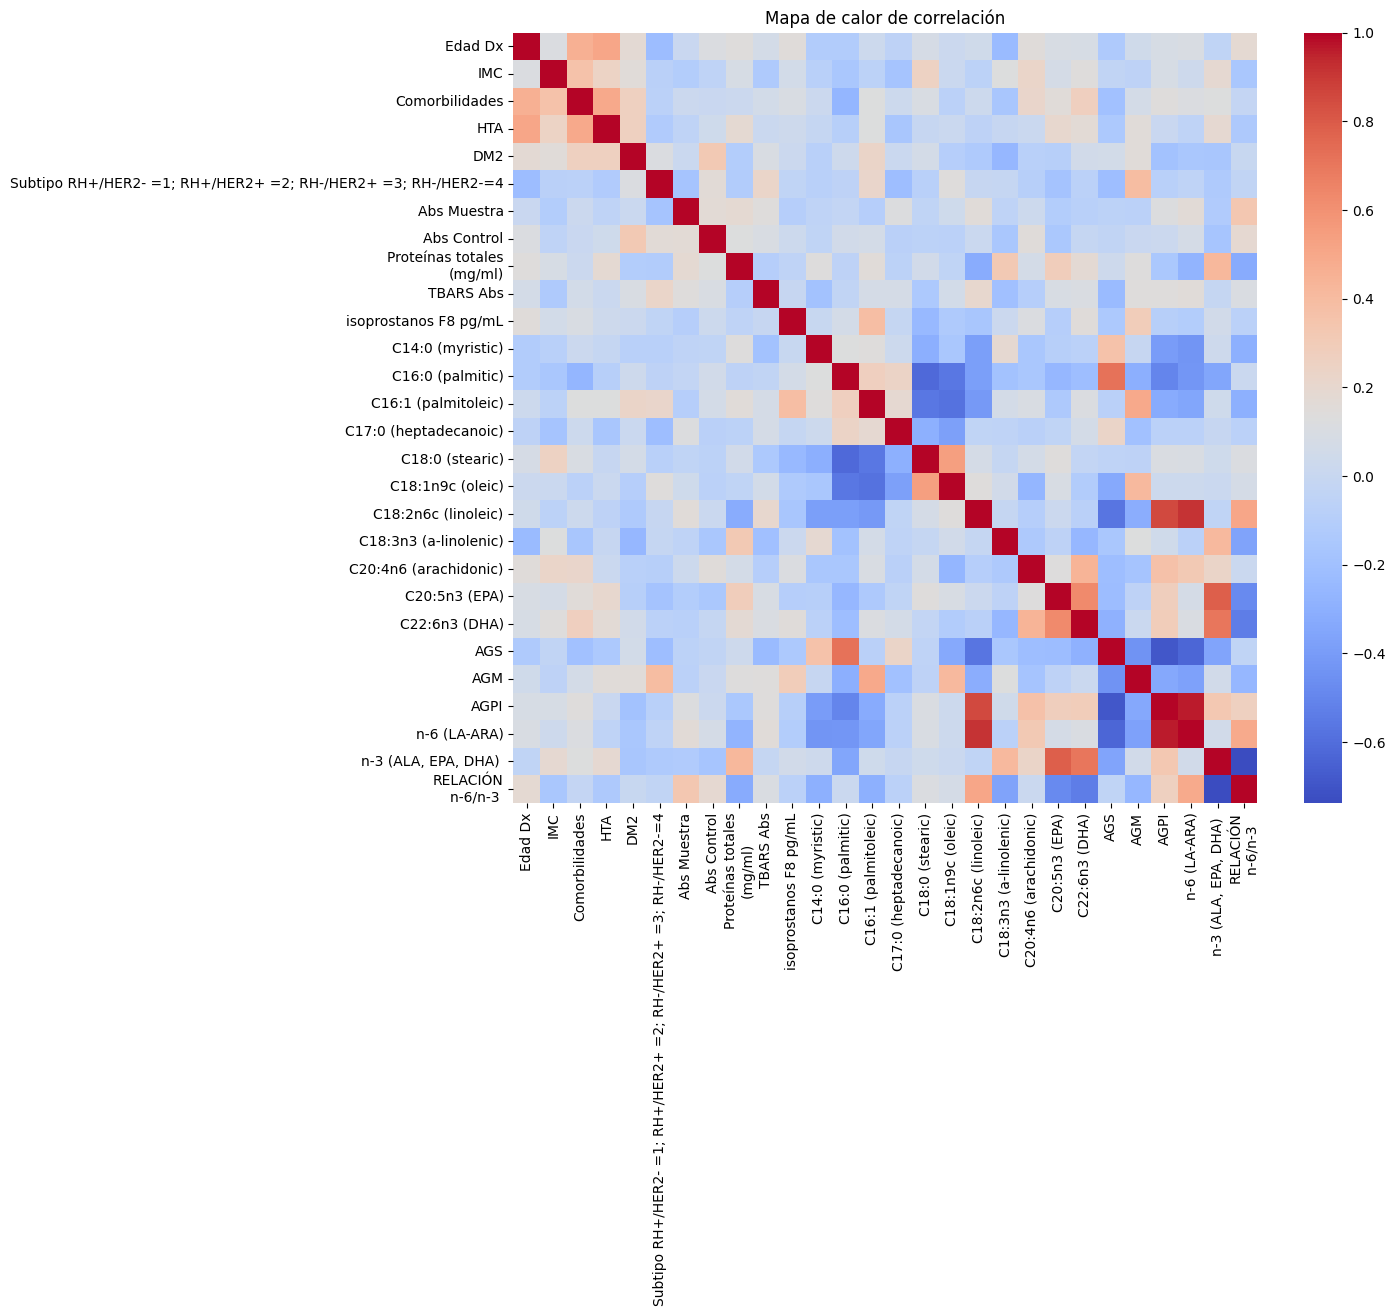

In [48]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Graficar el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

In [49]:
correlation_matrix['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'].abs().sort_values(ascending=False)

Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4    1.000000
AGM                                                              0.393784
TBARS Abs                                                        0.226591
Edad Dx                                                          0.222320
AGS                                                              0.220449
C17:0 (heptadecanoic)                                            0.219744
C16:1 (palmitoleic)                                              0.217565
C20:5n3 (EPA)                                                    0.180777
Abs Muestra                                                      0.176981
Abs Control                                                      0.162071
C18:1n9c (oleic)                                                 0.140211
n-3 (ALA, EPA, DHA)                                              0.131286
HTA                                                              0.121844
Proteínas totales\n(mg/ml)            

Accuracy: 0.4782608695652174

Classification Report:
               precision    recall  f1-score   support

           1       0.30      0.38      0.33         8
           2       0.62      0.53      0.57        15

    accuracy                           0.48        23
   macro avg       0.46      0.45      0.45        23
weighted avg       0.51      0.48      0.49        23



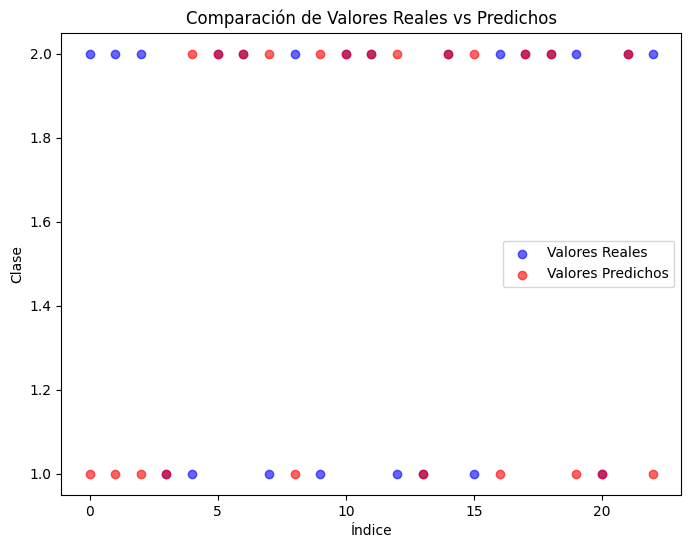

In [136]:
y = data['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4']
X = data.drop(columns=['Subtipo RH+/HER2- =1; RH+/HER2+ =2; RH-/HER2+ =3; RH-/HER2-=4'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier()

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_pca = rf_model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test.values, color='blue', label='Valores Reales', alpha=0.6)
plt.scatter(range(len(y_pred_pca)), y_pred_pca, color='red', label='Valores Predichos', alpha=0.6)
plt.title('Comparación de Valores Reales vs Predichos')
plt.xlabel('Índice')
plt.ylabel('Clase')
plt.legend()
plt.show()

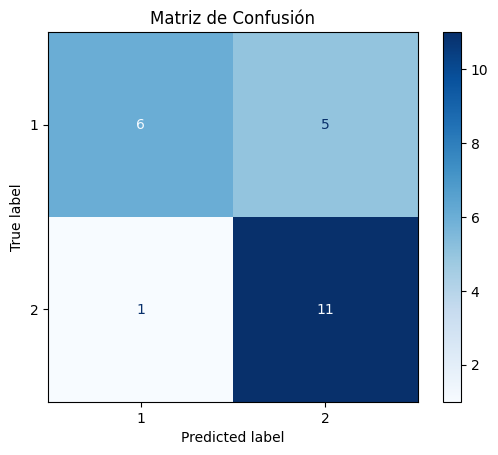

In [83]:
# Graficar la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pca, cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

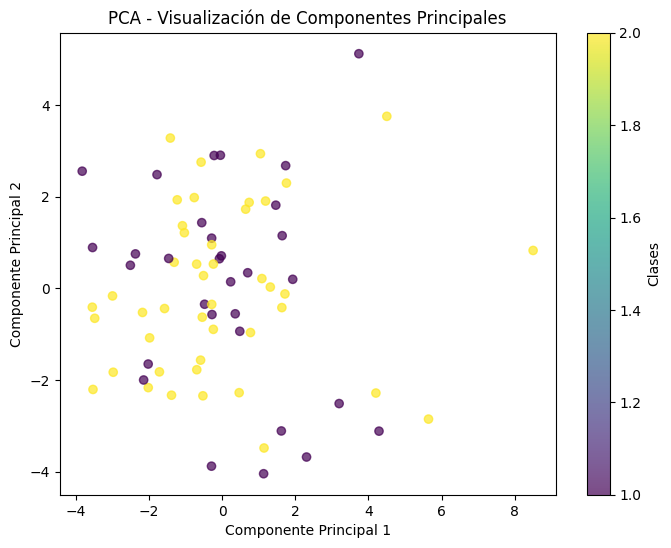

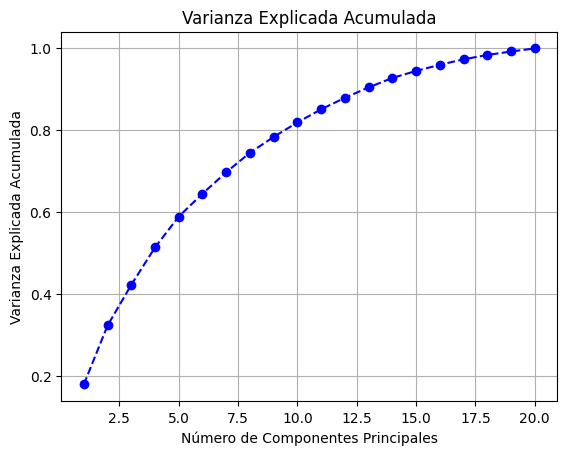

Varianza explicada por cada componente principal: [0.17938678 0.14359878 0.0990369  0.09135218 0.07507196 0.05569932
 0.05226354 0.04757594 0.03847781 0.03533879 0.0320616  0.02783273
 0.02541841 0.02300517 0.0170716  0.01507827 0.01329924 0.01049733
 0.00859809 0.00744671]
Varianza total explicada: 0.998111166385608


In [87]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=20) 
X_pca = pca.fit_transform(X_scaled)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Clases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Visualización de Componentes Principales')
plt.show()

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()


# Revisar la varianza explicada
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))

In [88]:
lista = dict()

for i in range(1000):
    # Dividir los datos transformados por PCA en conjuntos de entrenamiento y prueba
    X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=i)

    # Crear un modelo de Random Forest
    rf_model_pca = RandomForestClassifier()

    # Entrenar el modelo con los datos transformados por PCA
    rf_model_pca.fit(X_pca_train, y_train_pca)
    
    y_pred_pca = rf_model_pca.predict(X_pca_test)
    if accuracy_score(y_test_pca, y_pred_pca) > 0.8 and accuracy_score(y_test_pca, y_pred_pca) not in lista.values():
        lista[i] = accuracy_score(y_test_pca, y_pred_pca)
        # Predecir en el conjunto de prueba
        # Evaluar el modelo
        print(f"Accuracy {i} con PCA:", accuracy_score(y_test_pca, y_pred_pca))

# plt.figure(figsize=(8, 6))
# plt.scatter(range(len(y_test_pca)), y_test_pca.values, color='blue', label='Valores Reales', alpha=0.6)
# plt.scatter(range(len(y_pred_pca)), y_pred_pca, color='red', label='Valores Predichos', alpha=0.6)
# plt.title('Comparación de Valores Reales vs Predichos')
# plt.xlabel('Índice')
# plt.ylabel('Clase')
# plt.legend()
# plt.show()

Accuracy 101 con PCA: 0.8260869565217391
Accuracy 934 con PCA: 0.8695652173913043


Accuracy con PCA: 0.7391304347826086

Classification Report con PCA:
               precision    recall  f1-score   support

           1       0.71      0.56      0.62         9
           2       0.75      0.86      0.80        14

    accuracy                           0.74        23
   macro avg       0.73      0.71      0.71        23
weighted avg       0.74      0.74      0.73        23



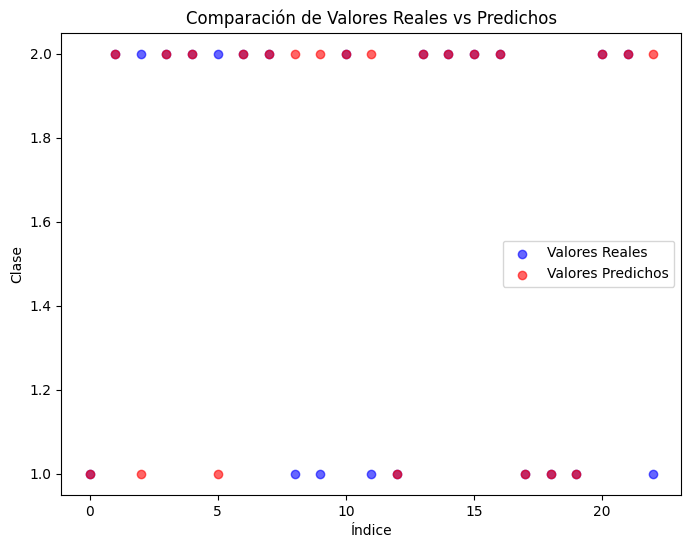

Accuracy con PCA: 0.782608695652174

Classification Report con PCA:
               precision    recall  f1-score   support

           1       0.64      0.88      0.74         8
           2       0.92      0.73      0.81        15

    accuracy                           0.78        23
   macro avg       0.78      0.80      0.78        23
weighted avg       0.82      0.78      0.79        23



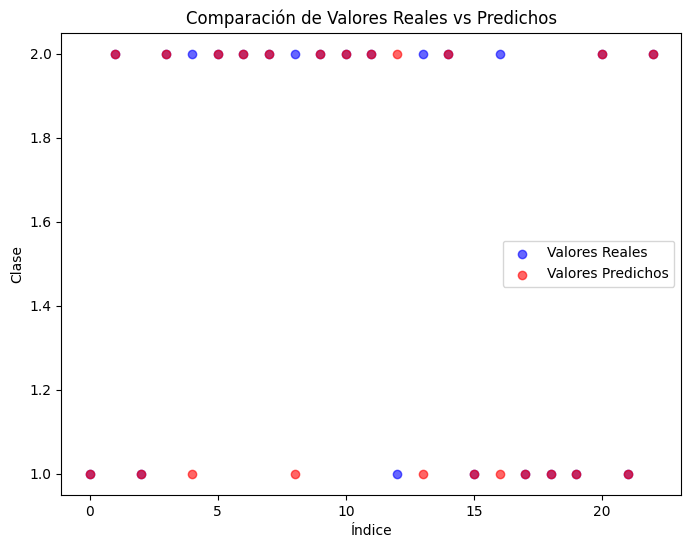

In [89]:
for i in lista.keys():
    # Dividir los datos transformados por PCA en conjuntos de entrenamiento y prueba
    X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=i)

    # Crear un modelo de Random Forest
    rf_model_pca = RandomForestClassifier()

    # Entrenar el modelo con los datos transformados por PCA
    rf_model_pca.fit(X_pca_train, y_train_pca)

    # Predecir en el conjunto de prueba
    y_pred_pca = rf_model_pca.predict(X_pca_test)

    # Evaluar el modelo
    print("Accuracy con PCA:", accuracy_score(y_test_pca, y_pred_pca))
    print("\nClassification Report con PCA:\n", classification_report(y_test_pca, y_pred_pca))

    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_test_pca)), y_test_pca.values, color='blue', label='Valores Reales', alpha=0.6)
    plt.scatter(range(len(y_pred_pca)), y_pred_pca, color='red', label='Valores Predichos', alpha=0.6)
    plt.title('Comparación de Valores Reales vs Predichos')
    plt.xlabel('Índice')
    plt.ylabel('Clase')
    plt.legend()
    plt.show()